<a href="https://colab.research.google.com/github/dianabutch023/IS4487/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email

PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [ ]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [ ]:
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/superstore_retail_orders.csv?raw=true')
print(df.describe)

print(df.info)


<bound method NDFrame.describe of        order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01          2023-07     Audrey Blanco   
1         51187  2023-07-01          2023-07       Isaac Allen   
2         51199  2023-07-02          2023-07        Ian Morgan   
3         51241  2023-07-04          2023-07        Alexa Bell   
4         51297  2023-07-08          2023-07        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29          2024-06        Ian Rogers   
56039     74062  2024-06-29          2024-06   Marcus Anderson   
56040     74065  2024-06-29          2024-06  Nathaniel Howard   
56041     74038  2024-06-29          2024-06        Robin Sanz   
56042     74110  2024-06-30          2024-06   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West 

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [9]:
#data preparation
print(df.dtypes)

order_id              int64
order_date           object
order_year_month     object
customer_name        object
city                 object
state_province       object
email                object
order_type           object
quantity            float64
product_name         object
product_line         object
product_price       float64
product_status       object
dtype: object


In [10]:
#outlier check and cleanup
# Check for outliers (example using IQR for 'Product Price')
Q1 = df['product_price'].quantile(0.25)
Q3 = df['product_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers (replace with NaN so we can drop them in the next step)
df.loc[(df['product_price'] < lower_bound) | (df['product_price'] > upper_bound), 'product_price'] = np.nan


In [11]:
#impute values
df = df.dropna()

# Example of imputing missing values (for 'Order Type' if any exist)
# Check if there are missing values in the selected column
if df['order_type'].isnull().any():
    df['order_type'] = df['order_type'].fillna(df['order_type'].mode()[0])


In [12]:
df['total_amount'] = df['quantity'] * df['product_price']

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [13]:
#create variable
df['complete_customer_info'] = (df['customer_name'].notna()) & (df['city'].notna()) & (df['state_province'].notna()) & (df['email'].notna()).astype(int)

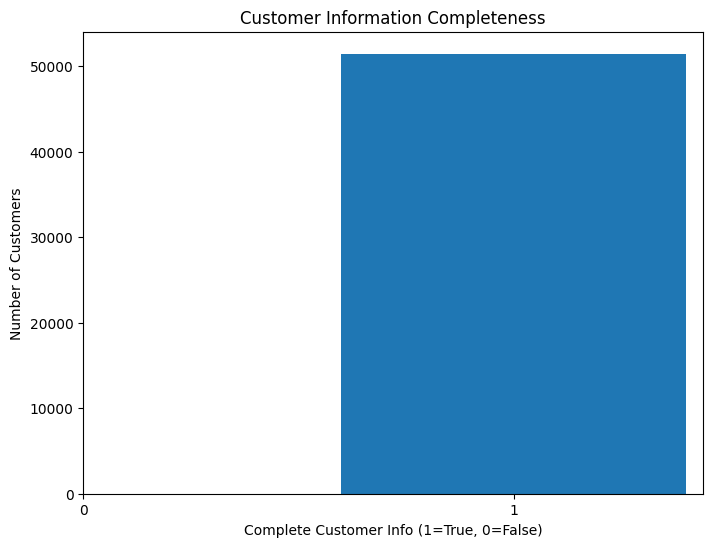

In [14]:
#create chart
customer_info_counts = df['complete_customer_info'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(customer_info_counts.index, customer_info_counts.values)
plt.xlabel("Complete Customer Info (1=True, 0=False)")
plt.ylabel("Number of Customers")
plt.title("Customer Information Completeness")
plt.xticks([0, 1]) # Ensures only 0 and 1 appear on the x-axis
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [ ]:
#seasonality
# Create a dictionary to map months to seasons


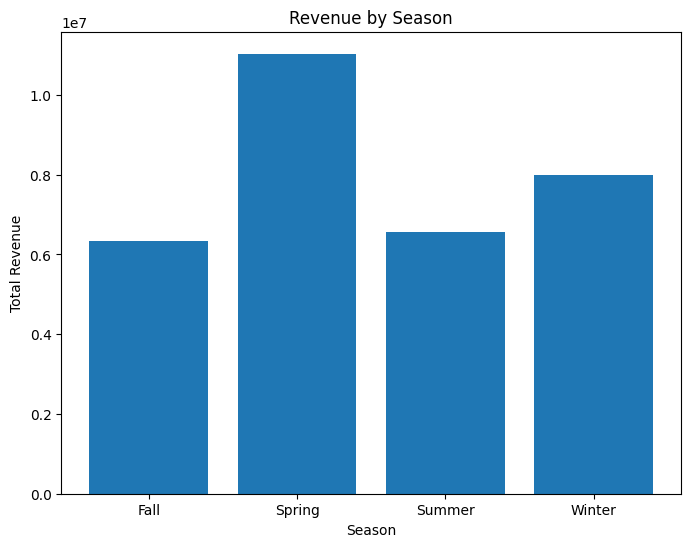

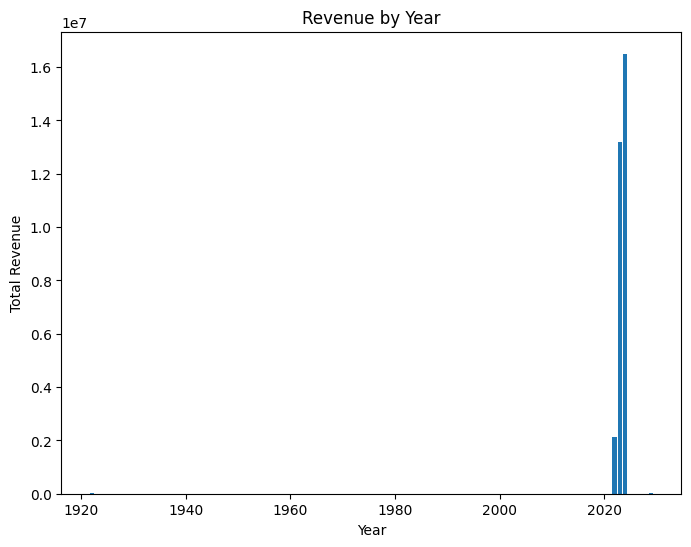

In [18]:
# prompt: create seasonal buckets for winter, spring, summer, fall

# Create a dictionary to map months to seasons
season_map = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',
    11: 'Fall', 12: 'Winter'
}

# Assuming 'Order Date' is a datetime object. If it's a string you'll need to convert it first
df['order_year_month'] = pd.to_datetime(df['order_year_month'], errors = 'coerce')
# Extract month from Order Date
df['Month'] = pd.DatetimeIndex(df['order_year_month']).month

# Map months to seasons
df['Season'] = df['Month'].map(season_map)

# Calculate total revenue per season
revenue_by_season = df.groupby('Season')['total_amount'].sum()

# Create a chart to show revenue by season
plt.figure(figsize=(8, 6))
plt.bar(revenue_by_season.index, revenue_by_season.values)
plt.xlabel("Season")
plt.ylabel("Total Revenue")
plt.title("Revenue by Season")
plt.show()

# Calculate total revenue per year
df['Order Year'] = pd.DatetimeIndex(df['order_year_month']).year
revenue_by_year = df.groupby('Order Year')['total_amount'].sum()

# Create a chart to show revenue by year
plt.figure(figsize=(8, 6))
plt.bar(revenue_by_year.index, revenue_by_year.values)
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Revenue by Year")
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

<ipython-input-20-08b3376485b1>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category'].fillna('Unknown', inplace=True)


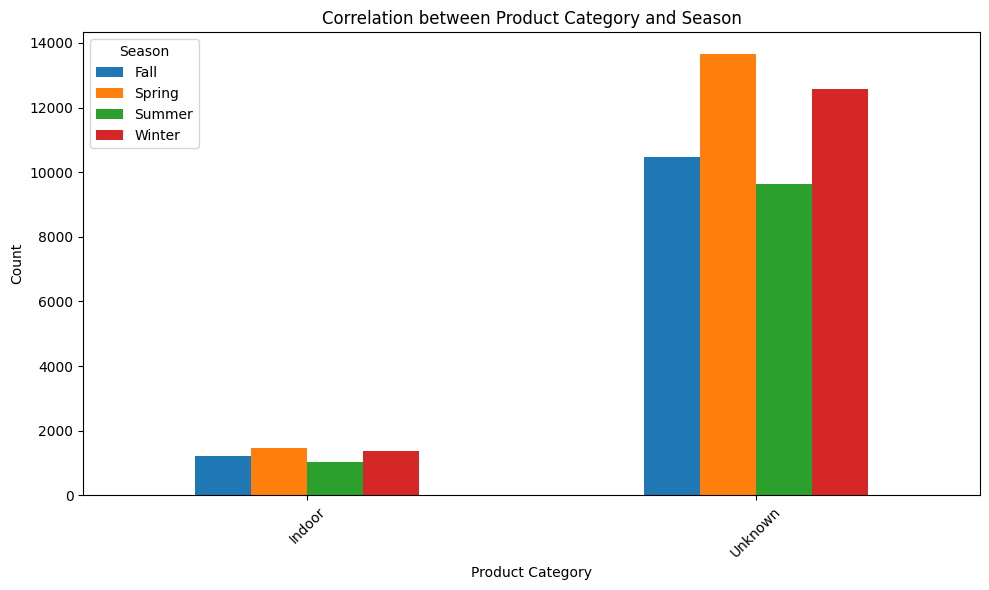

In [20]:
product_categories = {
    'Camping Equipment': 'Outdoor',
    'Golf Equipment': 'Outdoor',
    'Mountaineering Equipment': 'Outdoor',
    'Outdoor Protection': 'Outdoor',
    'Telephones and Communication': 'Indoor',
    'Office Supplies': 'Indoor',
    'Personal Accessories': 'Indoor',
    'Sports and Travel': 'Outdoor',
    'Tablets': 'Indoor',
    'Clothing': 'Indoor'
}

# Map product lines to indoor/outdoor categories
df['Product_Category'] = df['product_line'].map(product_categories)

# Handle potential missing values (if any product lines are not in the mapping)
df['Product_Category'].fillna('Unknown', inplace=True)

# Correlation between product category and season
product_season_correlation = pd.crosstab(df['Product_Category'], df['Season'])
product_season_correlation.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation between Product Category and Season')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()